### Importing Library 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Reading the Datasets 

In [4]:
data = pd.read_csv('Datasets/iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
new_data = data.drop('variety',axis = 1)

### Creating a List for Elbow Plot

In [6]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit(new_data)
    sse.append(km.inertia_)

### Elbow graph is ploted for the best k Values

Text(0, 0.5, 'see')

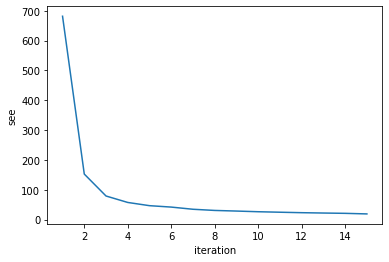

In [7]:
plt.plot(range(1,16),sse)
plt.xlabel('iteration')
plt.ylabel('see')

### Creating a Model with Cluster=3

In [8]:
km_model = KMeans(n_clusters=3)
prediction = km_model.fit_predict(new_data)

In [9]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [10]:
clustered_result = pd.DataFrame({
    'variety':data['variety'],
    'Cluster':prediction})

### Counting the no .of element in each Cluster

In [11]:
clustered_result['Cluster'].value_counts()

1    62
0    50
2    38
Name: Cluster, dtype: int64

### Calculating the Error

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhouette_score(new_data,km_model.labels_)

0.5528190123564102

### orginial Count in datasets

In [14]:
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [15]:
from collections import Counter
Counter(data['variety'])

Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})